In [98]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt  

import scipy.optimize as optimize
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.io
import random
from sklearn.preprocessing import PolynomialFeatures

In [99]:
def addOnes(X):
    m = X.shape[0]
    ones = np.ones(m)
    onesX = np.column_stack((ones, X))
    return onesX

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def initTheta(n, option=0):
    theta= np.zeros(n)
    if option != 0:
        theta = np.random.random(n)
    return theta.reshape(-1,1)

def computeCostLog(theta, X, y, lamda = 0.):
    X = addOnes(X)
    m = X.shape[0]
    y = y.reshape(-1,1)
    
    theta = theta.reshape(-1,1)
    theta0 = np.copy(theta); theta[0] = 0;
    
    h = sigmoid(X @ theta)
    J =  - y.T @ log(h) - (1- y).T @ log(1-h) + (lamda / 2) * theta0.T @ theta0
    J = J / (1.0 * m)
    return J[0,0]

def computeGradLog(theta, X, y, lamda = 0.):
    X = addOnes(X)
    m = X.shape[0]
    y = y.reshape(-1,1)
    
    theta = theta.reshape(-1,1)
    theta0 = np.copy(theta); theta[0] = 0;
    
    h = sigmoid(X @ theta)
    grad =  (X.T @ (h - y)) + lamda * theta0
    grad = grad / (1.0 * m)
    grad = grad.ravel()
    return grad

def gradientDescentLog(X, y,lamda = 0., alpha = 0.01, numIter = 1500, seed = 0):
    X = addOnes(X)
    m = X.shape[0]
    n = X.shape[1]
    y = y.reshape(-1,1)
    theta = initTheta(n, seed)
    theta0 = np.copy(theta); theta[0] = 0;
    
    J = np.zeros(numIter)
    for i in range(0, numIter):
        h = sigmoid(X @ theta)
        cost =  (1.0/m) * ((- y.T @ log(h) - (1- y).T @ log(1-h)) + (lamda / 2) * theta0.T @ theta0 )
        J[i] = cost[0]

        gradient =  (1.0/m) * ((X.T @ (h - y)) + lamda * theta0)
        theta = theta - alpha * gradient
    theta = theta.ravel()
    return (theta, J[-1], J)

def predict(theta, X):
    X = addOnes(X)
    h = sigmoid(X @ theta)
    threshold = 0.5
    predict = (h > threshold).astype(int)
    return predict

def accuracy(theta, X, y):
    p = predict(theta, X)
    compare = np.equal(p.reshape(1,-1),y.reshape(1,-1)).astype(int)
    accuracy = np.mean(compare)
    return accuracy
    

def plot2D(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='y')
    plt.show()
    
def plot2DLog(theta, X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='y')
    x_lin = np.linspace(np.min(X[:,0]) , np.max(X[:,0]), 100)
    plt.plot(x_lin, - (x_lin * theta[1] + theta[0])/theta[2])
    plt.show()
    
def plotPolyMesh2DLog(X, y, p, C=1e5):
    poly = PolynomialFeatures(p)
    X_poly = poly.fit_transform(X)

    logreg = linear_model.LogisticRegression(C=C)
    logreg.fit(X_poly,y.ravel())

    theta3 = np.append(logreg.intercept_, logreg.coef_)
    
    pts = 200
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, pts), np.linspace(y_min, y_max, pts))
    Z = logreg.predict( poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])[:,:]  )

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 4))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('1')
    plt.ylabel('2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    X = addOnes(X)
    predict = (X @ all_theta.T).argmax(1)
    return predict

def accuracyOneVsAll(all_theta, X, y):
    p = predictOneVsAll(all_theta, X)
    compare = np.equal(p.reshape(1,-1), y.reshape(1,-1)).astype(int)
    accuracy = np.mean(compare)  
    return accuracy

[[ 0.97540027]
 [ 0.52691154]
 [ 0.5257145 ]]


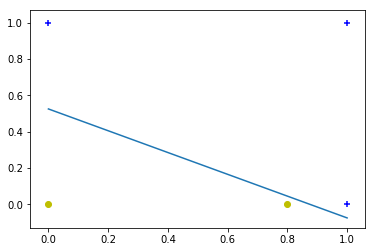

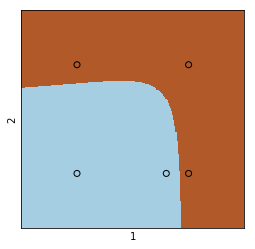

In [100]:
print(initTheta(3,2))

X = np.array([[0,0],[0,1],[1,0],[1,1] ,[0.8,0] ])
y = np.array([0,1,1,1,0])
(theta, _, _) = gradientDescentLog(X, y, alpha=0.05,numIter= 5000, seed=42)
plot2DLog(theta, X, y)
plotPolyMesh2DLog(X, y, 6, 1e3)

In [101]:
file = r'../data/ex3data1.mat'
scipy.io.whosmat(file)    # inspect what kinds of data the file has

[('X', (5000, 400), 'double'), ('y', (5000, 1), 'double')]

In [102]:
mat = scipy.io.loadmat(file)
X = mat['X']; print(X.shape)
y = mat['y']; print(y.shape)
y = y - 1
X_train = X
y_train = y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
print(X_train.shape)
#y = y[:1000,:]

(5000, 400)
(5000, 1)
(5000, 400)


In [103]:
K = 10
n = X_train.shape[1]

theta_all = np.zeros((K, n + 1))
for k in range(K):
    print(k)
    y_k = (y_train == k).astype('int')
    #print(y_k)
    #theta_k = optimize.fmin_l_bfgs_b(computeCostLog, initial_theta, args = (X_train, y_k),fprime=computeGradLog)[0]
    #theta_k = optimize.fmin_bfgs(computeCostLog, initial_theta, args = (X_train, y_k),fprime=computeGradLog)[0]
    (thetha_k, _, _) = gradientDescentLog(X, y, alpha=0.05, numIter=5000, seed =42)
    theta_all[k] = theta_k
    

print("done")

file = 'theta_all_gd.txt'
np.savetxt(file, theta_all, fmt='%f')
print(theta_all.shape)

0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log


1
2
3
4
5
6
7
8
9
done
(10, 401)


In [104]:
theta_all = np.loadtxt(file, dtype=float)
print(accuracyOneVsAll(theta_all, X_train, y_train))
#print(accuracyOneVsAll(theta_all, X_test, y_test))

0.1
